In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')

In [2]:
df.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


Delete unnamed columns

In [3]:
df.drop('Unnamed: 0', axis=1,inplace=True)


In [4]:
df.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


In [ ]:
df.info()

In [42]:
#a = df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)

Show the distribution of male and female

In [7]:
#Count of Female & Male Children 
df['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

In [61]:
#Distribution of male,Female 
del df['Id']
print(df.groupby(['Gender','Year','State']).sum())

                    Count
Gender Year State        
F      2004 AK       2317
            AL      19358
            AR      12014
            AZ      34335
            CA     228629
            CO      24675
            CT      14346
            DC       3510
            DE       3077
            FL      81941
            GA      50490
            HI       3661
            IA      13559
            ID       6449
            IL      68437
            IN      32454
            KS      13522
            KY      19436
            LA      20783
            MA      29296
            MD      24494
            ME       4421
            MI      48132
            MN      26223
            MO      28289
            MS      11716
            MT       2777
            NC      44429
            ND       2500
            NE       8382
...                   ...
M      2014 ME       4577
            MI      48003
            MN      27820
            MO      31999
            MS      13661
            

Show the top 5 most preferred names

In [19]:
del df['Year']

In [51]:
names = df.groupby("Name").sum()
names.sort_values("Count", ascending = 0).head()

,Count
Name,
Jacob,242874
Emma,214852
Michael,214405
Ethan,209277
Isabella,204798


What is the median name occurence in the dataset

In [37]:
names[names.Count == names.Count.median()]

,Count
Name,
Aishani,49
Alara,49
Alysse,49
Ameir,49
Anely,49
Antonina,49
Aveline,49
Aziah,49
Baily,49


Distribution of male and female born count by states

In [50]:
print(df.groupby(['Gender','State']).sum())

                Count
Gender State         
F      AK       26250
       AL      215308
       AR      129712
       AZ      368567
       CA     2414063
       CO      260805
       CT      141350
       DC       35276
       DE       31312
       FL      915422
       GA      549637
       HI       37279
       IA      144764
       ID       72808
       IL      695312
       IN      344962
       KS      147216
       KY      210201
       LA      221859
       MA      294236
       MD      269915
       ME       43718
       MI      480990
       MN      276884
       MO      307848
       MS      127343
       MT       31622
       NC      501151
       ND       30054
       NE       88998
...               ...
M      ME       55650
       MI      557090
       MN      318917
       MO      364924
       MS      160800
       MT       44143
       NC      577529
       ND       39507
       NE      112369
       NH       56482
       NJ      487900
       NM      113542
       NV 

TASK 2

Text(0, 0.5, 'Min and max temperature')

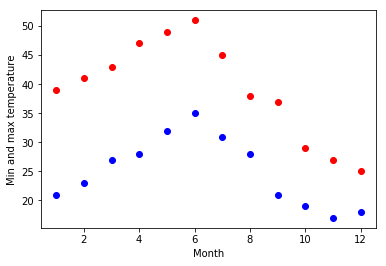

In [81]:
import numpy as np
import matplotlib.pyplot as plt
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(1,13)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

1.Fitting it to a periodic function

In [89]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, temp_min, [-40, 20, 0])

2. plot the fit

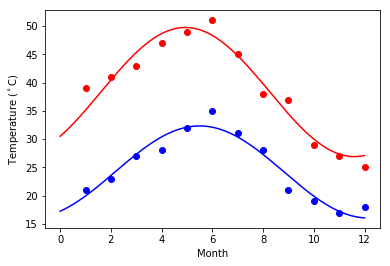

In [93]:
days = np.linspace(0,12,num=365)
plt.figure()
plt.plot(months,temp_max,'ro')
plt.plot(days,yearly_temps(days,*res_max),'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()
